In [7]:
import numpy as np
import matplotlib.pyplot as plt

KeyboardInterrupt: 

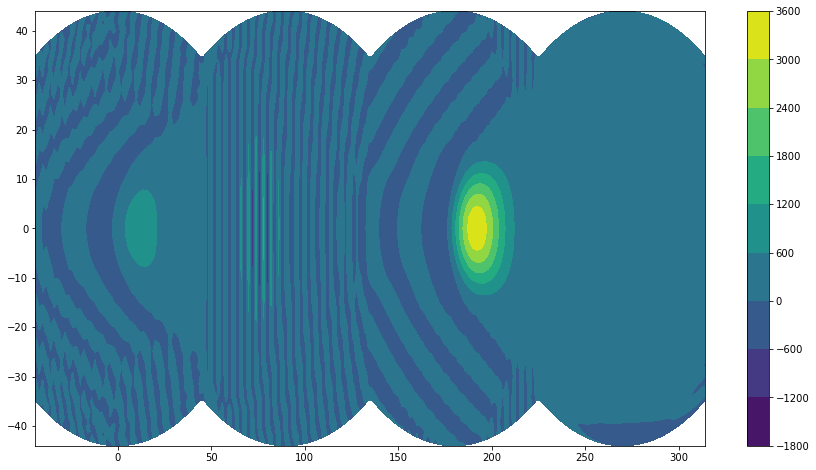

In [24]:
NX = 45
NY = 45
lon = np.loadtxt("../outputs/lon.txt").reshape(6, NX, NY) * 180. / np.pi
lat = np.loadtxt("../outputs/lat.txt").reshape(6, NX, NY) * 180. / np.pi

lon4Panel = np.concatenate((lon[0], lon[1], lon[2], lon[3]), axis=0)
lat4Panel = np.concatenate((lat[0], lat[1], lat[2], lat[3]), axis=0)

x = np.loadtxt("../outputs/x.txt").reshape(6, NX, NY)
y = np.loadtxt("../outputs/y.txt").reshape(6, NX, NY)
count = 0
for t in range(0, 3000, 10):
    h = np.loadtxt(f"../outputs/h/h_{t*10}.txt").reshape(6, NX, NY)
    u = np.loadtxt("../outputs/u/u_0.txt").reshape(6, NX, NY)
    v = np.loadtxt("../outputs/v/v_0.txt").reshape(6, NX, NY)

    h4panel = np.concatenate((h[0], h[1], h[2], h[3]), axis=0)
    plt.figure(figsize=(18,10))
    plt.contourf(lon4Panel, lat4Panel, h4panel)
    plt.colorbar()
    plt.savefig(f"../graphs/test/h/{count}.png")
    plt.close()
    count += 1
    # plt.show()

    """
    plt.figure(figsize=(8,8))
    plt.contourf(lon[0], lat[0], h[0])
    plt.colorbar()
    plt.savefig(f"../graphs/test/h_1/{t}.png")
    plt.close()
    # plt.show()
    plt.figure(figsize=(8,8))
    plt.contourf(lon[1], lat[1], h[1])
    plt.colorbar()
    plt.savefig(f"../graphs/test/h_2/{t}.png")
    plt.close()
    """


In [17]:
lon4Panel = np.concatenate((lon[0], lon[1], lon[2], lon[3]), axis=0)
# print(lon4Panel)

[-41.99998362 -41.99998362 -41.99998362 -41.99998362 -41.99998362
 -41.99998362 -41.99998362 -41.99998362 -41.99998362 -41.99998362
 -41.99998362 -41.99998362 -41.99998362 -41.99998362 -41.99998362
 -41.99998362 -41.99998362 -41.99998362 -41.99998362 -41.99998362
 -41.99998362 -41.99998362 -41.99998362 -41.99998362 -41.99998362
 -41.99998362 -41.99998362 -41.99998362 -41.99998362 -41.99998362
 -41.99998362 -41.99998362 -41.99998362 -41.99998362 -41.99998362
 -41.99998362 -41.99998362 -41.99998362 -41.99998362 -41.99998362
 -41.99998362 -41.99998362 -41.99998362 -41.99998362 -41.99998362]
